# Part 1: Asteroid Labyrinth

import libraries and dataset

In [160]:
import pandas as pd # handling csv files
import numpy as np # handling numbers
import matplotlib.pyplot as plt # plotting
import matplotlib.patches as patches # for legend patches

asteroid_data = pd.read_csv('Asteroid_Field_Data.csv')

plotting the asteroid data

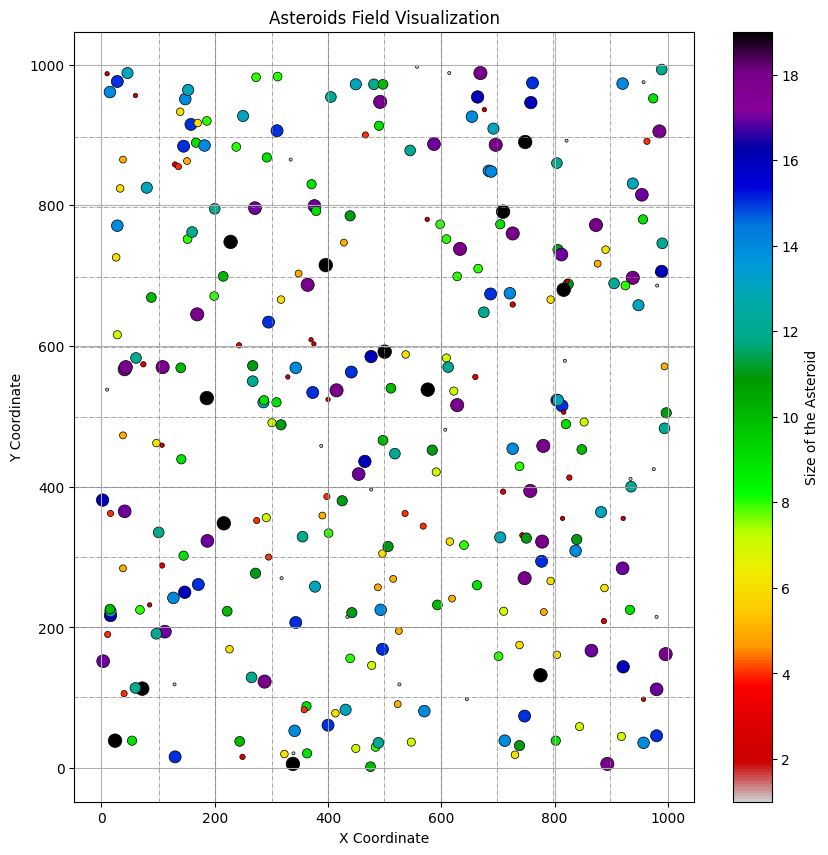

In [161]:
# setting grid 10x10
grid_columns = grid_rows = 10
x_min, x_max = asteroid_data['X'].min(), asteroid_data['X'].max()
y_min, y_max = asteroid_data['Y'].min(), asteroid_data['Y'].max()
sector_width = (x_max - x_min) / grid_columns
sector_height = (y_max - y_min) / grid_rows

# plotting onto the grid
plt.figure(figsize=(10, 10))
scatter = plt.scatter(
    asteroid_data['X'],
    asteroid_data['Y'],
    c=asteroid_data['Size'],
    cmap='nipy_spectral_r', # colormap
    s=asteroid_data['Size'] * 5, # size of the asteroid
    alpha=1.0,
    edgecolor='black',
    linewidth=0.5
)

plt.colorbar(scatter, label='Size of the Asteroid')
plt.title('Asteroids Field Visualization')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)

# grid lines
# vertical lines
for i in range(1, grid_columns):
    x_line = x_min + i * sector_width
    plt.axvline(x=x_line, color='gray', linestyle='-.', linewidth=0.5)

# horizontal lines
for i in range(1, grid_rows):
    y_line = y_min + i * sector_height
    plt.axhline(y=y_line, color='gray', linestyle='-.', linewidth=0.5)

plt.show()

calculating the total size of asteroid in each sector

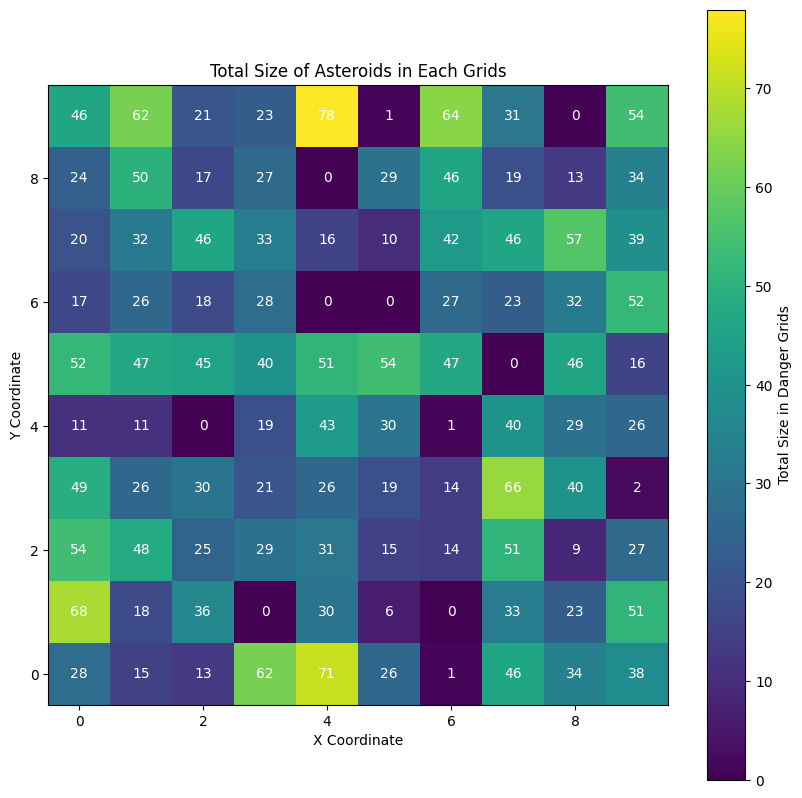

In [162]:
# set the safe threshold to each grid
SAFE_THRESHOLD = 25

# set danger grids to all zeros (assume all are safe initially)
danger_grids = np.zeros((grid_rows, grid_columns), dtype=int)

# iterate through each asteroid and mark the danger grids
for _, row in asteroid_data.iterrows():
    x_current = min(int((row['X'] - x_min) / sector_width), grid_columns - 1)
    y_current = min(int((row['Y'] - y_min) / sector_height), grid_rows - 1)
    danger_grids[y_current, x_current] += row['Size']
    
plt.figure(figsize=(10, 10))
plt.imshow(danger_grids, interpolation='nearest')
plt.colorbar(label='Total Size in Danger Grids', cmap='nipy_spectral_r')
plt.title('Total Size of Asteroids in Each Grids')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()  # Invert y-axis to match the grid layout

# Loop over data dimensions and create text annotations.
for i in range(danger_grids.shape[0]):
    for j in range(danger_grids.shape[1]):
        plt.text(j, i, str(danger_grids[i, j]),
                 ha='center', va='center', color='white')
        
plt.show()

Classify which grids are safe (green) or unsafe (red)

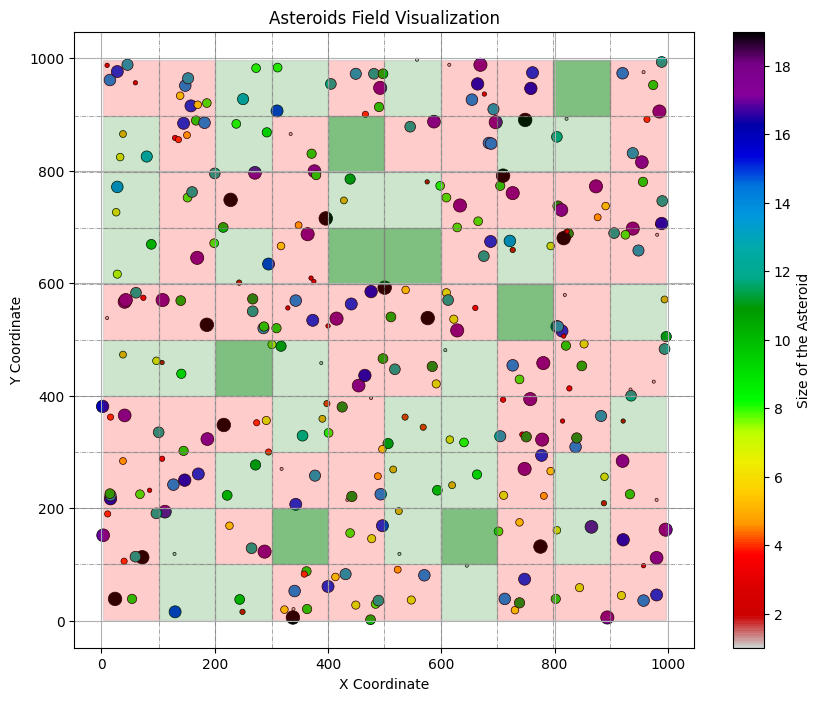

Safest sectors (density = 0):
[(2, 4), (3, 1), (4, 6), (4, 8), (5, 6), (6, 1), (7, 5), (8, 9)]


In [163]:
# plotting onto the grid
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(
    asteroid_data['X'],
    asteroid_data['Y'],
    c=asteroid_data['Size'],
    cmap='nipy_spectral_r', # colormap
    s=asteroid_data['Size'] * 5, # size of the asteroid
    alpha=1.0,
    edgecolor='black',
    linewidth=0.5
)

safe_sector_list = []
for x in range(grid_columns):
    for y in range(grid_rows):
        # Calculate the center of each sector
        sector_x = x_min + x * sector_width
        sector_y = y_min + y * sector_height
        color = 'red' if danger_grids[y, x] > SAFE_THRESHOLD else 'green'
        opacity = 0.2 if danger_grids[y, x] > 0 else 0.5
        # Draw a rectangle for each sector
        rect = patches.Rectangle(
            (sector_x, sector_y), sector_width, sector_height,
            linewidth=1, edgecolor='gray', facecolor=color, alpha=opacity
        )
        ax.add_patch(rect)
        
        if danger_grids[y, x] == 0:
            safe_sector_list.append((x, y))

plt.colorbar(scatter, label='Size of the Asteroid')
ax.set_title('Asteroids Field Visualization')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
plt.grid(True)

# grid lines
# vertical lines
for i in range(1, grid_columns):
    x_line = x_min + i * sector_width
    plt.axvline(x=x_line, color='gray', linestyle='-.', linewidth=0.5)

# horizontal lines
for i in range(1, grid_rows):
    y_line = y_min + i * sector_height
    plt.axhline(y=y_line, color='gray', linestyle='-.', linewidth=0.5)

plt.show()

print(f"Safest sectors (density = 0):\n{safe_sector_list}")


# Part 2: Market of Moira

import dataset

In [164]:
market_data = pd.read_csv('Moira_Market_Items.csv')

Filter and sort items

In [165]:
# filter items based on durability and price
filtered_items = market_data[(market_data["Durability"] > 85) & (market_data["Price"] <= 800)]

import time

default_time = time.time()
sorted_items = filtered_items.sort_values(by=["Durability", "Price"], ascending=[False, True])
default_time = time.time() - default_time

quick_sort_time = time.time()
quick_sort = filtered_items.sort_values(by=["Durability", "Price"], ascending=[False, True], kind='quicksort')
quick_sort_time = time.time() - quick_sort_time

merge_sort_time = time.time()
merge_sort = filtered_items.sort_values(by=["Durability", "Price"], ascending=[False, True], kind='mergesort')
merge_sort_time = time.time() - merge_sort_time

heap_sort_time = time.time()
heap_sort = filtered_items.sort_values(by=["Durability", "Price"], ascending=[False, True], kind='heapsort')
heap_sort_time = time.time() - heap_sort_time

stable_sort_time = time.time()
stable_sort = filtered_items.sort_values(by=["Durability", "Price"], ascending=[False, True], kind='stable')
stable_sort_time = time.time() - stable_sort_time


print(f"Best items to buy based on durability and price: (Default) {default_time:.4f} seconds")
print(sorted_items.head(10))

print(f"\nBest items to buy based on durability and price: (Quick Sort) {quick_sort_time:.4f} seconds")
print(quick_sort.head(10))

print(f"\nBest items to buy based on durability and price: (Merge Sort) {merge_sort_time:.4f} seconds")
print(merge_sort.head(10))

print(f"\nBest items to buy based on durability and price: (Heap Sort) {heap_sort_time:.4f} seconds")
print(heap_sort.head(10))

print(f"\nBest items to buy based on durability and price: (Stable Sort) {stable_sort_time:.4f} seconds")
print(stable_sort.head(10))

Best items to buy based on durability and price: (Default) 0.0018 seconds
      Stall ID      Item Name  Price  Durability  Compatibility
348  STALL-156   Quantum Lens    524          99           0.64
77   STALL-187       Ion Lens    610          99           0.60
339  STALL-057  Solar Emitter    720          99           0.56
341  STALL-100  Cyber Emitter    135          98           0.66
245  STALL-158       Ion Core    205          98           0.94
2    STALL-153     Solar Core    394          98           0.99
263  STALL-076     Hyper Lens    397          98           0.98
283  STALL-084   Nano Emitter    781          98           0.60
329  STALL-156  Neutron Drive    558          97           0.67
270  STALL-029    Plasma Core    658          97           0.90

Best items to buy based on durability and price: (Quick Sort) 0.0030 seconds
      Stall ID      Item Name  Price  Durability  Compatibility
348  STALL-156   Quantum Lens    524          99           0.64
77   STALL-187  